# Solar energy forecasting

## Importing libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

C:\Users\TALAL.Talal.000\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Single PV module datasets (weather/power)

In [81]:
data_f = pd.read_csv('pv module data.csv', parse_dates=[0])
data_f = data_f.set_index("Time") # set Datetime as an index
data_f

,PV_Power,T_air,G_h,G_tilt,W_s,W_d
Time,,,,,,
2017-01-01 00:00:00,NaN,0.74,0.0,0.0,0.30,296.4
2017-01-01 00:01:00,NaN,0.67,0.0,0.0,0.47,269.2
2017-01-01 00:02:00,NaN,0.57,0.0,0.0,0.84,265.3
2017-01-01 00:03:00,NaN,0.53,0.0,0.0,0.63,275.4
2017-01-01 00:04:00,NaN,0.53,0.0,0.0,0.58,265.3
...,...,...,...,...,...,...
2017-12-31 23:56:00,NaN,2.91,0.0,0.0,0.41,68.2
2017-12-31 23:57:00,NaN,2.85,0.0,0.0,1.01,42.8
2017-12-31 23:58:00,NaN,2.83,0.0,0.0,1.22,46.6


### Resampling datasets with 10 minutes time interval

In [82]:
data=data_f.fillna(0)
data=data.resample('10T',closed='left').asfreq()[0:]
data

,PV_Power,T_air,G_h,G_tilt,W_s,W_d
Time,,,,,,
2017-01-01 00:00:00,0.0,0.74,0.0,0.0,0.30,296.4
2017-01-01 00:10:00,0.0,0.54,0.0,0.0,0.41,262.3
2017-01-01 00:20:00,0.0,0.85,0.0,0.0,0.00,263.0
2017-01-01 00:30:00,0.0,0.69,0.0,0.0,0.00,334.0
2017-01-01 00:40:00,0.0,0.89,0.0,0.0,0.00,326.9
...,...,...,...,...,...,...
2017-12-31 23:20:00,0.0,3.22,0.0,0.0,0.68,79.0
2017-12-31 23:30:00,0.0,2.82,0.0,0.0,0.68,45.6
2017-12-31 23:40:00,0.0,3.03,0.0,0.0,0.68,21.0


### Extracting datetime features to perform important feature selection

In [83]:
#Extracting some features from the date/time
final_df = (data.assign(year = data.index.year
                        ,month = data.index.month
                     ,day = data.index.day
                     ,day_of_year = data.index.dayofyear
                     ,week = data.index.isocalendar().week
                     ,week_day = data.index.weekday 
                     ,quarter = data.index.quarter
                     ,hour=data.index.hour
                    , minutes= data.index.minute )
           )

final_df

,PV_Power,T_air,G_h,G_tilt,W_s,W_d,year,month,day,day_of_year,week,week_day,quarter,hour,minutes
Time,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.74,0.0,0.0,0.30,296.4,2017,1,1,1,52,6,1,0,0
2017-01-01 00:10:00,0.0,0.54,0.0,0.0,0.41,262.3,2017,1,1,1,52,6,1,0,10
2017-01-01 00:20:00,0.0,0.85,0.0,0.0,0.00,263.0,2017,1,1,1,52,6,1,0,20
2017-01-01 00:30:00,0.0,0.69,0.0,0.0,0.00,334.0,2017,1,1,1,52,6,1,0,30
2017-01-01 00:40:00,0.0,0.89,0.0,0.0,0.00,326.9,2017,1,1,1,52,6,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:20:00,0.0,3.22,0.0,0.0,0.68,79.0,2017,12,31,365,52,6,4,23,20
2017-12-31 23:30:00,0.0,2.82,0.0,0.0,0.68,45.6,2017,12,31,365,52,6,4,23,30
2017-12-31 23:40:00,0.0,3.03,0.0,0.0,0.68,21.0,2017,12,31,365,52,6,4,23,40


### January 2017 solar power for training the model

In [84]:
solar_gen6=final_df.loc[final_df['month'].isin([1])].iloc[:,0]
solar_gen6.drop(solar_gen6.tail(1).index,inplace=True)
solar_gen6

Time
2017-01-01 00:00:00    0.0
2017-01-01 00:10:00    0.0
2017-01-01 00:20:00    0.0
2017-01-01 00:30:00    0.0
2017-01-01 00:40:00    0.0
                      ... 
2017-01-31 23:10:00    0.0
2017-01-31 23:20:00    0.0
2017-01-31 23:30:00    0.0
2017-01-31 23:40:00    0.0
2017-01-31 23:50:00    0.0
Name: PV_Power, Length: 4464, dtype: float64

### Weather features

In [85]:
feature_sol6=final_df.loc[final_df['month'].isin([1])].iloc[:,1:]
feature_sol6.drop(feature_sol6.tail(1).index,inplace=True)
feature_sol6

,T_air,G_h,G_tilt,W_s,W_d,year,month,day,day_of_year,week,week_day,quarter,hour,minutes
Time,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.74,0.0,0.0,0.30,296.4,2017,1,1,1,52,6,1,0,0
2017-01-01 00:10:00,0.54,0.0,0.0,0.41,262.3,2017,1,1,1,52,6,1,0,10
2017-01-01 00:20:00,0.85,0.0,0.0,0.00,263.0,2017,1,1,1,52,6,1,0,20
2017-01-01 00:30:00,0.69,0.0,0.0,0.00,334.0,2017,1,1,1,52,6,1,0,30
2017-01-01 00:40:00,0.89,0.0,0.0,0.00,326.9,2017,1,1,1,52,6,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-31 23:10:00,4.14,0.0,0.0,0.14,241.7,2017,1,31,31,5,1,1,23,10
2017-01-31 23:20:00,4.09,0.0,0.0,1.01,259.1,2017,1,31,31,5,1,1,23,20
2017-01-31 23:30:00,3.99,1.0,0.0,0.84,270.5,2017,1,31,31,5,1,1,23,30


### Using Gradient boosting regressor to select most important features for forecasting

 0    T_air= 0.15
 1      G_h= 0.33
 2   G_tilt= 0.27
 3      W_s= 0.01
 4      W_d= 0.01
 5     year= 0.00
 6    month= 0.00
 7      day= 0.04
 8 day_of_year= 0.04
 9     week= 0.01
10 week_day= 0.03
11  quarter= 0.00
12     hour= 0.11
13  minutes= 0.00


C:\Users\TALAL.Talal.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

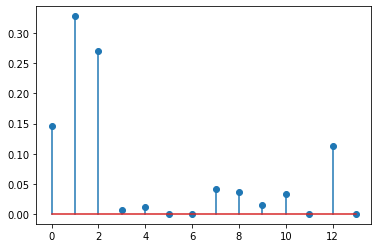

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#Calculating feature importance
X_train,X_test,y_train,y_test=train_test_split(feature_sol6,solar_gen6,train_size=0.75,test_size=0.25,random_state=0,shuffle=False)

gbr = GradientBoostingRegressor(max_features=2,random_state=0)
gbr.fit(X_train, y_train)
for i in range(len(feature_sol6.columns)):
    print("%2d %8s=%5.2f" % (i,feature_sol6.columns[i], gbr.feature_importances_[i]))
plt.stem(gbr.feature_importances_)


## Removing less important features

In [87]:
cols = [2,3,4,5,6,7,8,9,10,11,12,13]
feature_sol6=feature_sol6.drop(feature_sol6.columns[cols],axis=1)
feature_sol6

,T_air,G_h
Time,,
2017-01-01 00:00:00,0.74,0.0
2017-01-01 00:10:00,0.54,0.0
2017-01-01 00:20:00,0.85,0.0
2017-01-01 00:30:00,0.69,0.0
2017-01-01 00:40:00,0.89,0.0
...,...,...
2017-01-31 23:10:00,4.14,0.0
2017-01-31 23:20:00,4.09,0.0
2017-01-31 23:30:00,3.99,1.0


## Forecasting Solar generation using GBR

In [88]:
#libraries for MLPR and accuracies check
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Splitting datasets into test and train set

In [89]:
#Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(feature_sol6,solar_gen6,train_size=0.75,test_size=0.25,random_state=0,shuffle=False)

CV score.......... 0.9120394370164664
Training score.... 0.8865271822062627
Test score........ 0.9226109061645209


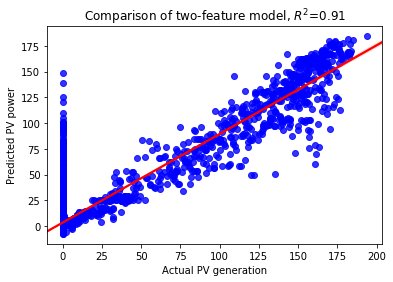

In [90]:
gbr = GradientBoostingRegressor(max_features=2,random_state=0)
gbr.fit(X_train, y_train)

yhat=gbr.predict(X_train)

RsquaredCV=cross_val_score(gbr, X_test, y_test, cv=5).mean()
RsquaredTR=gbr.score(X_train,y_train)

sns.regplot(x=y_train,y=yhat, line_kws={"color": "red"},scatter_kws={"color": "blue"})
yhat=gbr.predict(X_test)
plt.xlabel('Actual PV generation')
plt.ylabel('Predicted PV power')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
print("Test score........",r2_score(y_true=y_test,y_pred=yhat))

### Plotting January 2017 predicted vs actual power generation

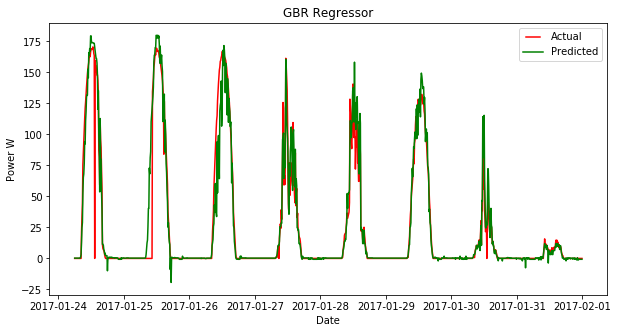

In [91]:
from matplotlib.legend_handler import HandlerLine2D
from pandas.plotting import register_matplotlib_converters

yhat=pd.DataFrame(yhat,columns=['Predicted Energy'])
yhat.index=y_test.index

#Plotting predicted solar production
plt.figure(figsize=(10,5))
line1,=plt.plot(y_test,'r',label='Actual')
line2,=plt.plot(yhat,'green',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Power W')
plt.title('GBR Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

# January 2021 University of Vaasa solar power forecast

## Importing January Vaasa weather data

In [92]:
wea_data = pd.read_csv('January vaasa weather.csv', parse_dates=[1])
wea_vaasa=wea_data.iloc[:4465,5:]
wea_vaasa=wea_vaasa.fillna(0)
wea_vaasa

,Air temperature (degC),Global radiation (W/m2)
0,-0.5,-0.9
1,-0.5,-0.9
2,-0.6,-1.2
3,-0.5,-1.3
4,-0.7,-1.4
...,...,...
4460,-12.2,-1.0
4461,-12.0,-1.0
4462,-11.7,-1.3
4463,-11.7,-1.2


## Assigning time index to weather data

In [93]:
dti = pd.date_range(start="2021-01-01",end='2021-02-1', freq="10T",name="Time")
wea_vaasa.index=dti
wea_vaasa.drop(wea_vaasa.tail(1).index,inplace=True)
wea_vaasa

,Air temperature (degC),Global radiation (W/m2)
Time,,
2021-01-01 00:00:00,-0.5,-0.9
2021-01-01 00:10:00,-0.5,-0.9
2021-01-01 00:20:00,-0.6,-1.2
2021-01-01 00:30:00,-0.5,-1.3
2021-01-01 00:40:00,-0.7,-1.4
...,...,...
2021-01-31 23:10:00,-11.7,-0.8
2021-01-31 23:20:00,-12.2,-1.0
2021-01-31 23:30:00,-12.0,-1.0


## Forecasting January PV production using GBR

In [94]:
X_orig,X_no,y_orig,y_no=train_test_split(wea_vaasa,wea_vaasa,train_size=0.75,random_state=0,shuffle=False)

yhat=gbr.predict(X_orig)


### Plot of forecasted data

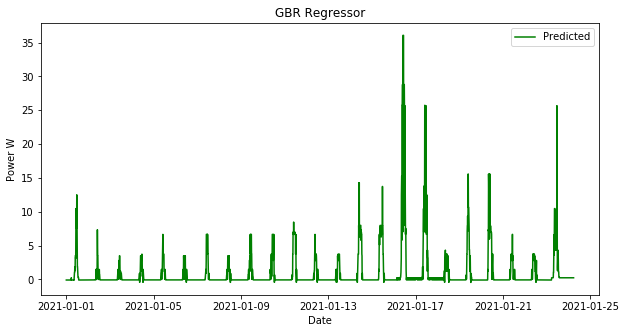

In [95]:
yhat=pd.DataFrame(yhat,columns=['Predicted Energy'])
yhat.index=X_orig.index

#Plotting predicted solar production
plt.figure(figsize=(10,5))
line2,=plt.plot(yhat,'green',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Power W')
plt.title('GBR Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

### Ploting average hourly PV production in January 2021

<Figure size 720x360 with 0 Axes>

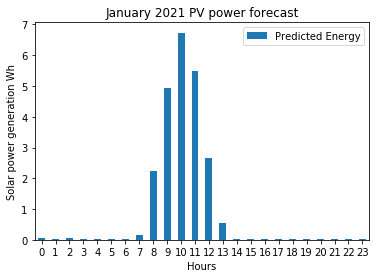

In [96]:
hour = (yhat.assign(hour=yhat.index.hour
                    ))
hours={}
i=0

for i in range(24):
    hours[i]=hour.loc[hour['hour'].isin([i])].iloc[:,0:1].mean().abs()
    #print(str(i) + " hour avgerage PV generation:  " + str(hours[i]))      
hours=pd.DataFrame.from_dict(hours).T
#plt.bar(range(0,23,1),hours,width=5)
#plt.plot(hours)
plt.figure(figsize=(10,5))
ax = hours.plot.bar(rot=0)
plt.xlabel("Hours")
plt.ylabel("Solar power generation Wh")
plt.title("January 2021 PV power forecast")
plt.show()

# May 2021 University of Vaasa solar power forecast

## Importing May 2021 Vaasa weather data

In [97]:
wea_data = pd.read_csv('May vaasa weather.csv', parse_dates=[1])
wea_vaasa=wea_data.iloc[:4465,5:]
wea_vaasa=wea_vaasa.fillna(0)
wea_vaasa

,Air temperature (degC),Global radiation (W/m2)
0,-0.9,-0.7
1,-1.2,-0.9
2,-1.4,-1.1
3,-1.6,-1.7
4,-2.0,-1.4
...,...,...
4460,6.6,-2.0
4461,6.0,-1.6
4462,6.1,-1.5
4463,6.0,-1.4


## Assigning time index to weather data

In [98]:
dti = pd.date_range(start="2021-05-01",end='2021-06-1', freq="10T",name="Time")
wea_vaasa.index=dti
wea_vaasa.drop(wea_vaasa.tail(1).index,inplace=True)
wea_vaasa

,Air temperature (degC),Global radiation (W/m2)
Time,,
2021-05-01 00:00:00,-0.9,-0.7
2021-05-01 00:10:00,-1.2,-0.9
2021-05-01 00:20:00,-1.4,-1.1
2021-05-01 00:30:00,-1.6,-1.7
2021-05-01 00:40:00,-2.0,-1.4
...,...,...
2021-05-31 23:10:00,6.6,-2.2
2021-05-31 23:20:00,6.6,-2.0
2021-05-31 23:30:00,6.0,-1.6


## Forecasting May PV production using GBR

In [99]:
X_orig,X_no,y_orig,y_no=train_test_split(wea_vaasa,wea_vaasa,train_size=0.75,random_state=0,shuffle=False)

yhat=gbr.predict(X_orig)


### Plot of forecasted data

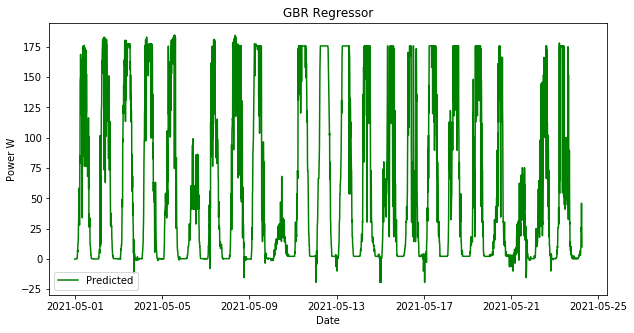

In [100]:
yhat=pd.DataFrame(yhat,columns=['Predicted Energy'])
yhat.index=X_orig.index

#Plotting predicted solar production
plt.figure(figsize=(10,5))
line2,=plt.plot(yhat,'green',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Power W')
plt.title('GBR Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

### Ploting average hourly PV module production in May 2021

<Figure size 720x360 with 0 Axes>

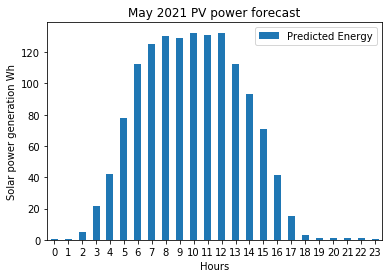

In [101]:
hour = (yhat.assign(hour=yhat.index.hour
                    ))
hours={}
i=0

for i in range(24):
    hours[i]=hour.loc[hour['hour'].isin([i])].iloc[:,0:1].mean().abs()

hours=pd.DataFrame.from_dict(hours).T

plt.figure(figsize=(10,5))
ax = hours.plot.bar(rot=0)
plt.xlabel("Hours")
plt.ylabel("Solar power generation Wh")
plt.title("May 2021 PV power forecast")
plt.show()

### Average air temperature May 2021

<Figure size 720x360 with 0 Axes>

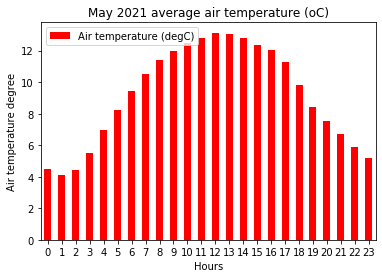

In [102]:
tmp = [0,1,2,3,4,6]
temperature=wea_data.drop(wea_data.columns[tmp],axis=1).iloc[:4464,:]
index=wea_vaasa.index
index=index[0:4464]
temperature.index=index
temperature
hour = (temperature.assign(hour=temperature.index.hour
                    ))
                    
hourss={}
i=0

for i in range(24):
    hourss[i]=hour.loc[hour['hour'].isin([i])].iloc[:,0:1].mean().abs()
    #print(str(i) + " hour avgerage PV generation:  " + str(hourss[i])) 

hourss=pd.DataFrame.from_dict(hourss).T
#Plot of average air temperature
plt.figure(figsize=(10,5))
ax = hourss.plot.bar(rot=0, color='red')
plt.xlabel("Hours")
plt.ylabel("Air temperature degree")
plt.title("May 2021 average air temperature (oC)")
plt.show()